In [ ]:
%matplotlib inline
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import seaborn as sns

Full view of the Data

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   class     37306 non-null  int64  
 2   Start     37306 non-null  int64  
 3   End       37306 non-null  int64  
 4   Length    37306 non-null  int64  
 5   Night     37306 non-null  int64  
 6   Gap       37306 non-null  int64  
 7   WS        37306 non-null  int64  
 8   idx       37306 non-null  int64  
 9   Base      37306 non-null  float64
 10  StartAdj  37306 non-null  float64
 11  LenAdj    37306 non-null  float64
 12  Comp      37306 non-null  float64
 13  Trans     37306 non-null  float64
 14  Press     37306 non-null  float64
 15  p1s       37306 non-null  int64  
 16  p1l       37306 non-null  int64  
 17  p2s       37306 non-null  int64  
 18  p2l       37306 non-null  int64  
 19  MalAdj    37306 non-null  int64  
 20  NFZ       37306 non-null  in

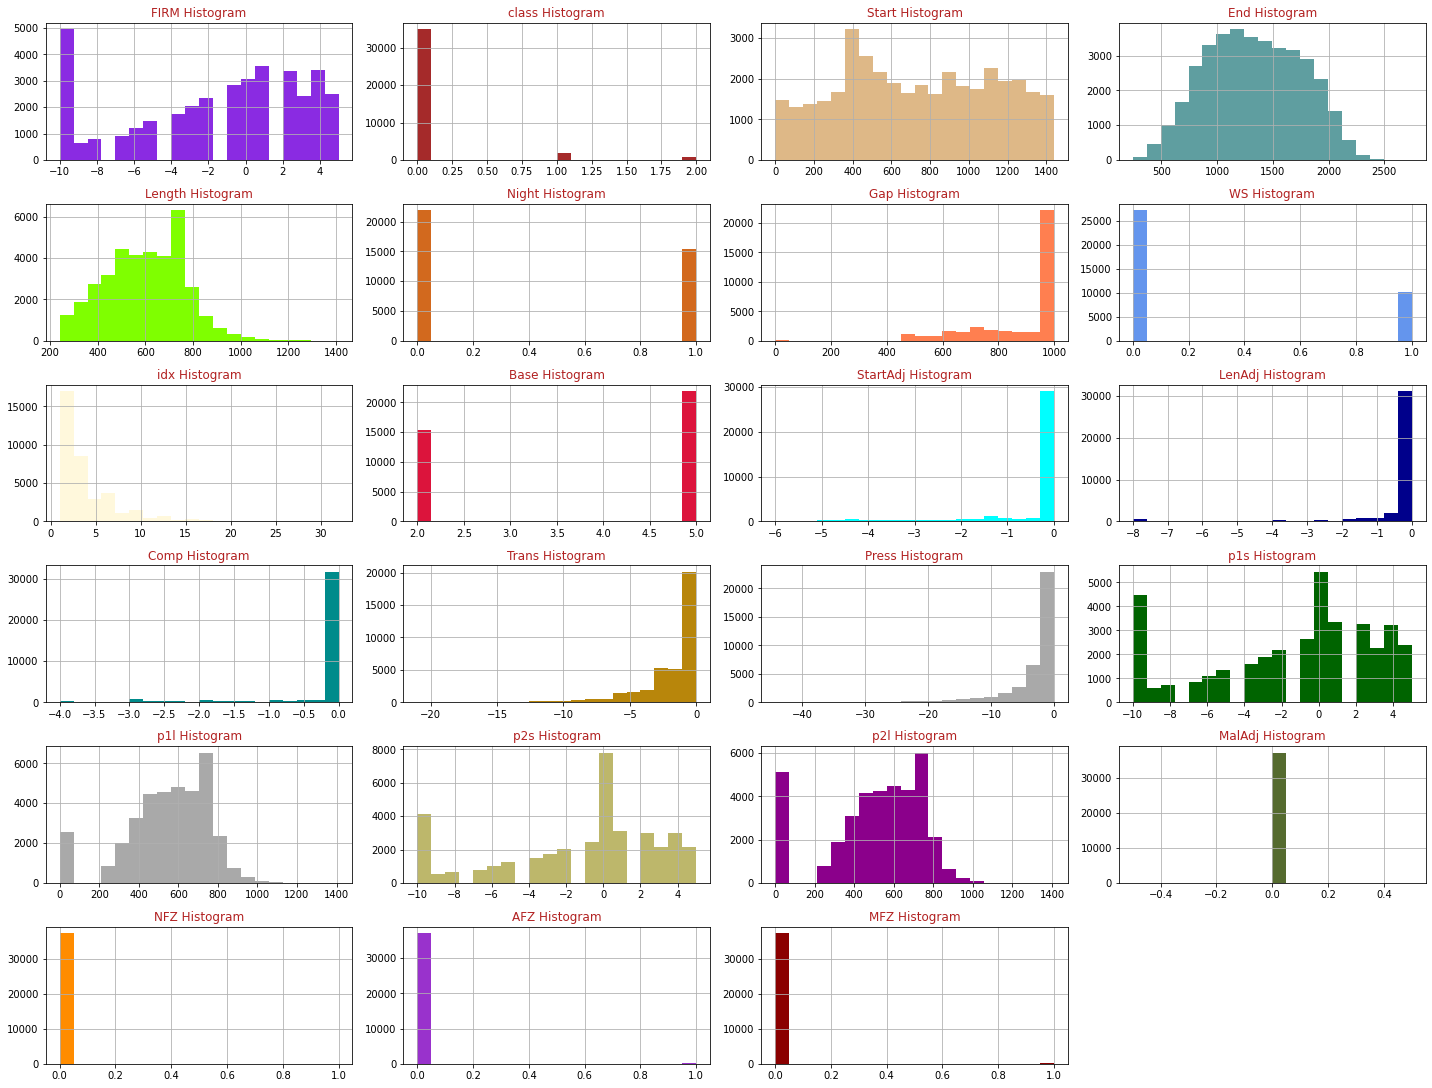

In [ ]:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

#Q2)How accurately does the regressor classify the samples?

In [ ]:
def run_logistic_regression(df,seed):
    #get the data
    y = df.iloc[:,df.columns == 'class']
    X = df.iloc[:, df.columns != 'class']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    #scale data for better results
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    #train a model
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model,X_test_scaled,y_test

(A) The two types of accident, 1 and 2, really are different types of accident, caused by different situations, so these should be distinguishable by the various statistics in the file.  The classifier should find 3 distinct groups (0, 1, and 2), and there should be different criteria used by the regressor to determine which group the sample belongs in.

The accuracy for the training set is 94.52%
The accuracy for the test set is 94.36%


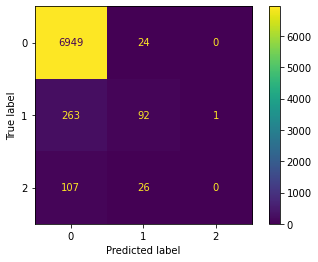

In [ ]:
#Base one
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
model,X_test_scaled,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

(B) The two types of accident are indistinguishable, there is no real difference.  So the regressor should only categorize into two groups: No Accident and Accident.

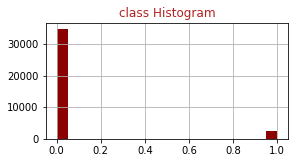

The accuracy for the training set is 94.94%
The accuracy for the test set is 94.96%


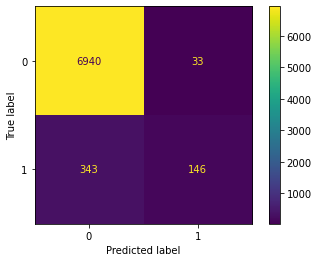

In [ ]:
#Forced one vs rest
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
#change all class 2 to 1 so we only have 2 classes
df['class']=df['class'].replace(2,1)
#show that this went through
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
f = fig.add_subplot(8, 4, i + 1)
df['class'].hist(bins = 20, ax = f, facecolor = colors[i])
f.set_title('class' + " Histogram", color = colors[35])
plt.show()
model,X_test_scaled,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test,yhat)

From this we get that the accuracy is fairly high for this model failing getting mostly false positives. We also find that by forcing one vs rest onto the data set we can get a better result than using the multiclass.

#Q1)Are the two types of accident distinguishable?  Is there a fairly reliable way to tell these apart?

By looking at the accuracy above we can see that the accidents are indistingusable. The best way to tell is by seeing how accurate the our accident predictions were by looking at a confusion matrix. By looking at the 3 way confusion matrix we find that our accuracy is  lower as we have a significant amount of miscalssifications between the accidents. Since the frequency of class 2 data is so low describing the accident as distingusiable decreases the accuracy of the model as it increases the chances of missclassification between accidents. Since we forced one vs rest we can see that there are no longer any missclassification between accidents. We also had less missclassifications of the accidents as no accidents as 263+107>343.

#Q3)Which of the features (input columns) are significant in performing the classification, and which can/should be ignored?

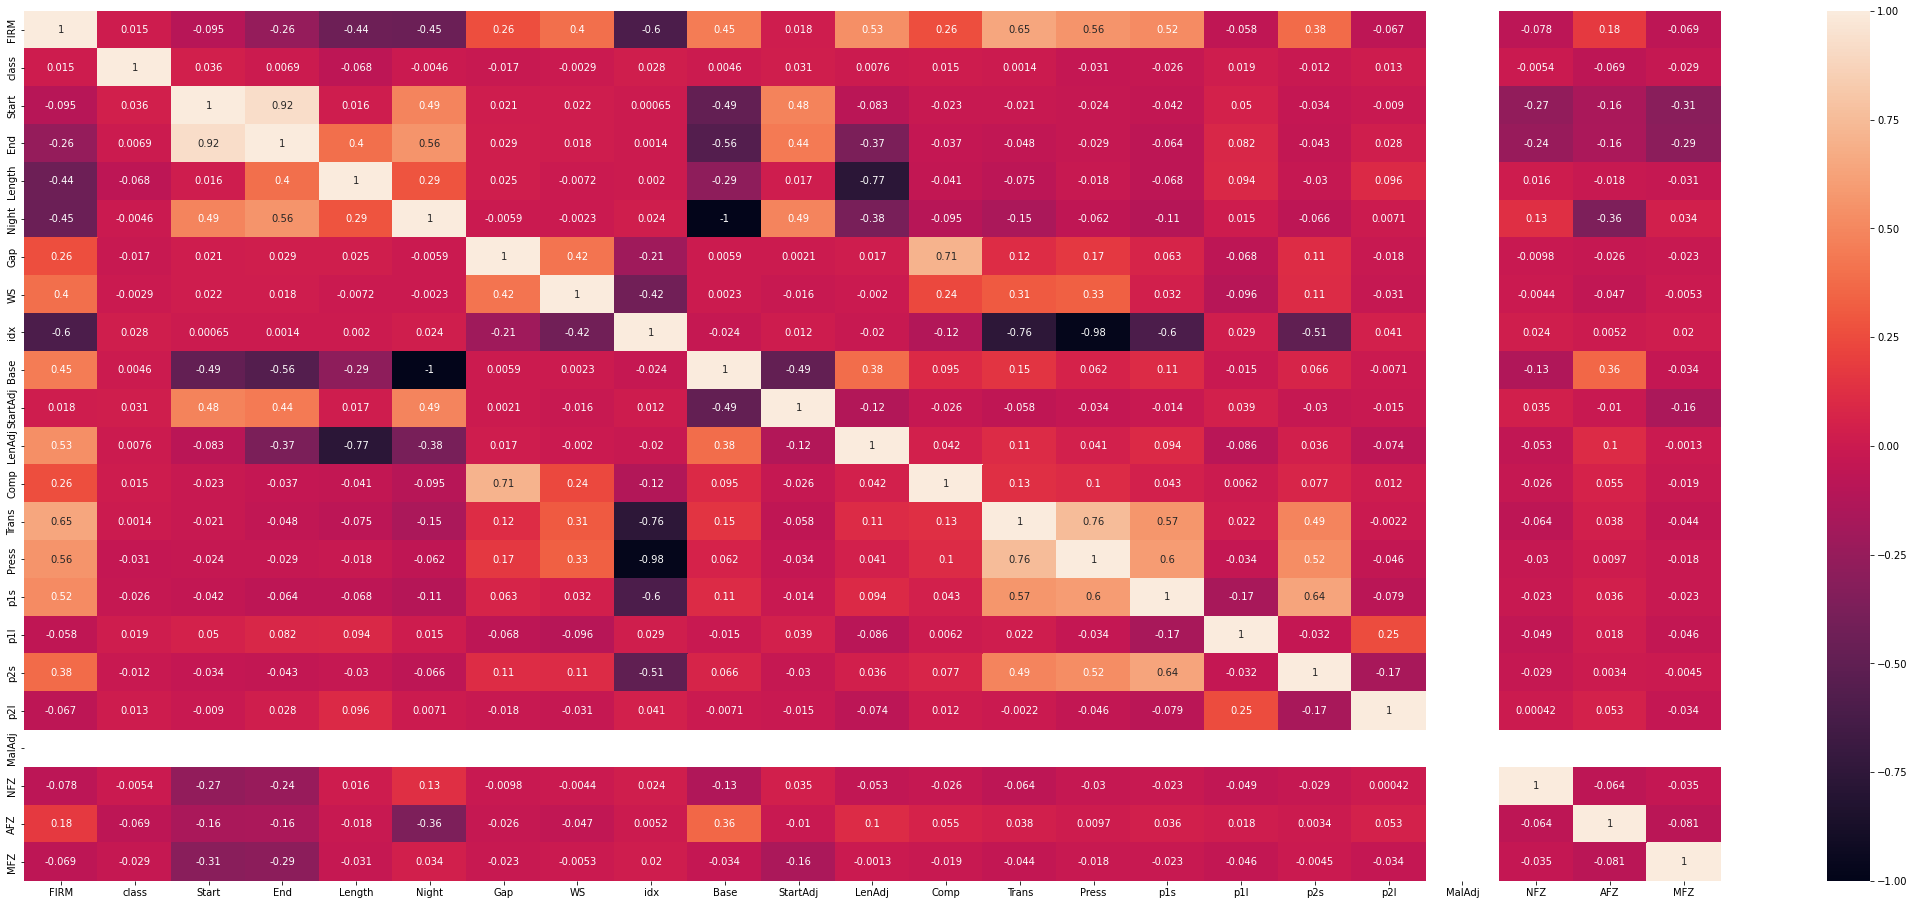

In [ ]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Dropping Features and calculating accuracy

In [ ]:
def search_significant_features(df,seed):
    y = df.iloc[:,df.columns == 'class']
    X = df.iloc[:, df.columns != 'class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    return 100*round(test_accuracy,4)

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
base_accuracy= search_significant_features(df,12)
significance={"worse":[[],[]],"better":[[],[]],"equal":[[],[]]}
for feature in df.columns:
    if feature == 'class':
        continue
    # print(feature)
    df_copy=df.copy()
    df_copy.drop(columns=[feature],inplace=True)
    test_accuracy = search_significant_features(df_copy,12)
    #special storage for printing
    if base_accuracy==test_accuracy:
        significance["equal"][0].append(feature)
        significance["equal"][1].append(test_accuracy)
    elif base_accuracy<test_accuracy:
        significance["better"][0].append(feature)
        significance["better"][1].append(test_accuracy)
    else:
        significance["worse"][0].append(feature)
        significance["worse"][1].append(test_accuracy)

for key in significance:
    print(f"\n{key} than base accuracy of {base_accuracy}%")
    for value,accuracy in zip(significance[key][0],significance[key][1]):
        print(f"\tRemoving {value:9} produce a accuracy of {accuracy:.2f}%")


worse than base accuracy of 94.36%
	Removing FIRM      produce a accuracy of 94.34%
	Removing StartAdj  produce a accuracy of 94.34%
	Removing NFZ       produce a accuracy of 94.22%
	Removing AFZ       produce a accuracy of 93.73%
	Removing MFZ       produce a accuracy of 94.08%

better than base accuracy of 94.36%
	Removing WS        produce a accuracy of 94.37%
	Removing LenAdj    produce a accuracy of 94.47%
	Removing Trans     produce a accuracy of 94.40%
	Removing p1s       produce a accuracy of 94.38%
	Removing p2s       produce a accuracy of 94.37%
	Removing p2l       produce a accuracy of 94.38%

equal than base accuracy of 94.36%
	Removing Start     produce a accuracy of 94.36%
	Removing End       produce a accuracy of 94.36%
	Removing Length    produce a accuracy of 94.36%
	Removing Night     produce a accuracy of 94.36%
	Removing Gap       produce a accuracy of 94.36%
	Removing idx       produce a accuracy of 94.36%
	Removing Base      produce a accuracy of 94.36%
	Removing

Through grid search we can see which features affect the model's test prediction. Any feature under better or equal can be seen as not significant as their removal improved or didn't changed the accuracy of the model. The significant features are under worse as the removal of each cause the model to perfore mariginally or significanly worse than before.  

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
#grid search of worse better and equal features
for key in significance:
    for key2 in significance:
        if key!=key2:
            print(f"\nnew logistic regression model with features in {key} and {key2}")
        else:
            print(f"\nnew logistic regression model with features in {key}")
        #using set arithmatic to make feature selections
        combine = set(significance[key][0]).union(set(significance[key2][0]))
        df_copy = df[combine]
        df_copy['class']=df['class']
        print("Features in model: ",df_copy.columns.tolist())
        model,X_test,y_test = run_logistic_regression(df_copy,12)


new logistic regression model with features in worse
Features in model:  ['AFZ', 'MFZ', 'StartAdj', 'NFZ', 'FIRM', 'class']
The accuracy for the training set is 94.48%
The accuracy for the test set is 94.47%

new logistic regression model with features in worse and better
Features in model:  ['AFZ', 'MFZ', 'WS', 'Trans', 'StartAdj', 'NFZ', 'LenAdj', 'p2l', 'p1s', 'p2s', 'FIRM', 'class']
The accuracy for the training set is 94.42%
The accuracy for the test set is 94.36%

new logistic regression model with features in worse and equal
Features in model:  ['Gap', 'Base', 'Night', 'NFZ', 'End', 'Comp', 'FIRM', 'AFZ', 'MalAdj', 'MFZ', 'Length', 'p1l', 'StartAdj', 'idx', 'Start', 'Press', 'class']
The accuracy for the training set is 94.47%
The accuracy for the test set is 94.43%

new logistic regression model with features in better and worse
Features in model:  ['AFZ', 'MFZ', 'WS', 'Trans', 'NFZ', 'StartAdj', 'LenAdj', 'p2l', 'p1s', 'p2s', 'FIRM', 'class']
The accuracy for the training set

If we look at the accuracy above we find that the models that include the features from worse have the best accuracy. This shows that those features are significant in solving the problem.

I want to see if we can drop more features as in the worse category there are some features that only got marginally worse.

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df_copy=df[significance['worse'][0]].copy()
df_copy['class']=df['class']
df_copy.info()
for i,value in enumerate(significance['worse'][0]):
    df_copy.drop(columns=[value],inplace=True)
    if i!= len(significance['worse'][0])-1:
        print(f"\nDropped: {value}")
        model,X_test,y_test = run_logistic_regression(df_copy,12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   StartAdj  37306 non-null  float64
 2   NFZ       37306 non-null  int64  
 3   AFZ       37306 non-null  int64  
 4   MFZ       37306 non-null  int64  
 5   class     37306 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.0 MB

Dropped: FIRM
The accuracy for the training set is 94.48%
The accuracy for the test set is 94.47%

Dropped: StartAdj
The accuracy for the training set is 94.48%
The accuracy for the test set is 94.47%

Dropped: NFZ
The accuracy for the training set is 94.34%
The accuracy for the test set is 94.34%

Dropped: AFZ
The accuracy for the training set is 93.66%
The accuracy for the test set is 93.71%


By dropping each feature one by one we find that we can reduce down to 3 features(NFZ,AFZ,MFZ) to get the highest acccuracy model for this dataset.
 

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df_copy=df[significance['worse'][0]].copy()
df_copy['class']=df['class']
df_copy.drop(columns=['FIRM','StartAdj'],inplace=True)
df_copy.info()
df_copy['class']=df_copy['class'].replace(2,1)
model,X_test,y_test = run_logistic_regression(df_copy,12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NFZ     37306 non-null  int64
 1   AFZ     37306 non-null  int64
 2   MFZ     37306 non-null  int64
 3   class   37306 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB
The accuracy for the training set is 94.71%
The accuracy for the test set is 94.85%


Though not as accurate as the model with all the features with forces one vs rest it shows that many of the featyres do not significantly affect the model's accuracy. Since this model accuract is only 0.11% less we can say that the most significant features are NFZ,AFZ, and MFZ.

#Extra Credit: running regression without firm


The accuracy for the training set is 94.47%
The accuracy for the test set is 94.44%


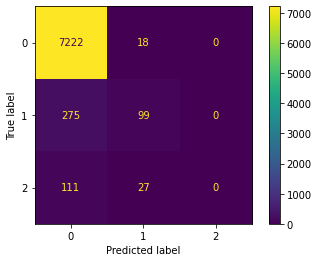

In [ ]:
#Base one
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['FIRM'],inplace =True)
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

The accuracy for the training set is 94.94%
The accuracy for the test set is 94.97%


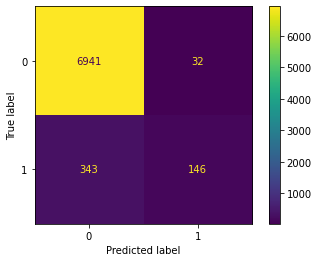

In [ ]:
#Forced one vs rest
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['FIRM'],inplace =True)
df['class']=df['class'].replace(2,1)
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

From this we get that FIRM feature does affect the accuracy if we use the base multiclass model. However when we force one vs rest the model accuracy is only ~0.1% better.   

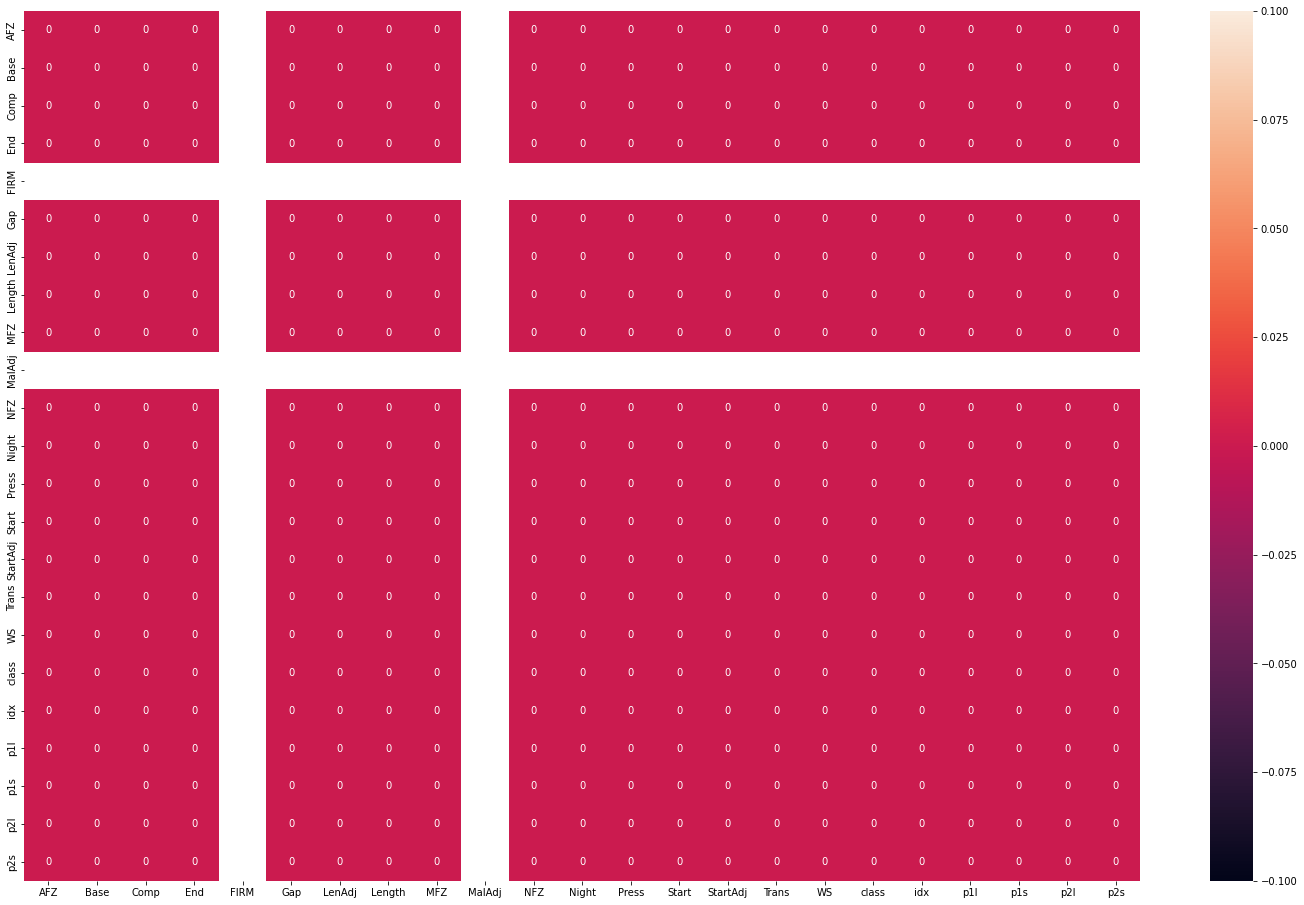

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
coor_map_with_firm= df.corr().copy()
df.drop(columns=['FIRM'],inplace =True)
coor_map_without_firm=df.corr()
plt.figure(figsize = (25, 16))
sns.heatmap(coor_map_without_firm.subtract(coor_map_with_firm), annot = True)
plt.show()

By subtracting the corralation matrix of one with firm and one without firm we see that the feature 'FIRM' has no significane on any other feature. This is seen as we have a table full with 0.

#Extra Code 

One Vs One for dataset

The accuracy for the training set is 72.99%
The accuracy for the test set is 72.80%


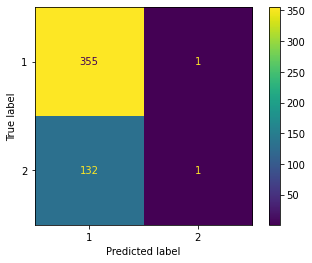

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] >0]
model,X_test_scaled,y_test = run_logistic_regression(df,40)
yhat = model.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

The accuracy for the training set is 96.24%
The accuracy for the test set is 96.08%


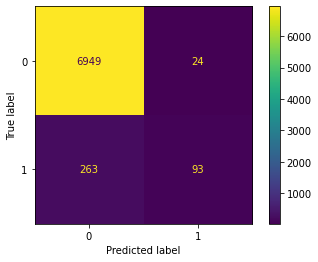

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] <2]
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

The accuracy for the training set is 98.38%
The accuracy for the test set is 98.47%


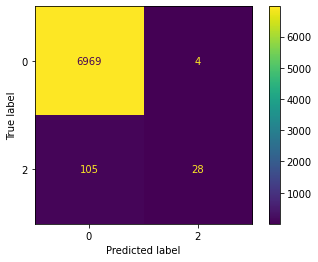

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] !=1]
model,X_test,y_test= run_logistic_regression(df,12)
yhat = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)